# Import important libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
import tensorflow as tf

# Load the fashion Mnist data rom keras datasets in form of tuple of training and test set data

### Once Loaded we will normalize the data

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train/255.0
X_test = X_test/255.0

4423680/4422102 [==============================] - 1s 0us/step


# The downloaded data has no channels which is required by CNN Conv2D layers

### We simple use np.expand_dims to expand one more dimension 

In [3]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [4]:
k = len(set(y_train))
print("Number of classes are", k)

Number of classes are 10


# Creating CNN model

### We use Conv2D with 32 filters and stride of 2 inplace of maxpooling layer with relu activation
### We use Conv2D with 64 filters and stride of 2 inplace of maxpooling layer with relu activation
### We use Conv2D with 128 filters and stride of 2 inplace of maxpooling layer with relu activation
### We flatten the Conv2D layers using Flatten layer and place a Dropout layer with 0.2
### We add Dense layer with 128 neurons and relu activation accompanied by a Dropout Layer with 0.2
### Finally we add an output layer with 10 neurons (no of classes) with softmax activation
### We use Adam as optimizer, sparse_categorical_crossentropy as loss and accuracy as metrics

In [6]:
i = Input(shape = X_train[0].shape)
l = Conv2D(32, (3,3), strides = 2, activation = 'relu')(i)
l = Conv2D(64, (3,3), strides = 2, activation = 'relu')(l)
l = Conv2D(128, (3,3), strides = 2, activation = 'relu')(l)
l = Flatten()(l)
l = Dropout(0.2)(l)
l = Dense(128, activation = 'relu')(l)
l = Dropout(0.2)(l)
l = Dense(k, activation = 'softmax')(l)

In [7]:
model = Model(i,l)
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [8]:
r = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 15)

Epoch 1/15
1875/1875 [==============================] - 9s 4ms/step - loss: 0.7468 - accuracy: 0.7266 - val_loss: 0.4310 - val_accuracy: 0.8404
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3942 - accuracy: 0.8517 - val_loss: 0.3499 - val_accuracy: 0.8714
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3325 - accuracy: 0.8745 - val_loss: 0.3241 - val_accuracy: 0.8764
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3032 - accuracy: 0.8845 - val_loss: 0.3059 - val_accuracy: 0.8844
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2695 - accuracy: 0.8965 - val_loss: 0.3055 - val_accuracy: 0.8877
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2377 - accuracy: 0.9090 - val_loss: 0.2953 - val_accuracy: 0.8931
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2267 - accuracy: 0.9140 - val_loss: 0.3243 - val_accuracy:

# The History

### the model contains history object containing losses and accuracy
### We plot the accuracy and losses using matplotlib

Text(0.5, 1.0, 'Accuracy')

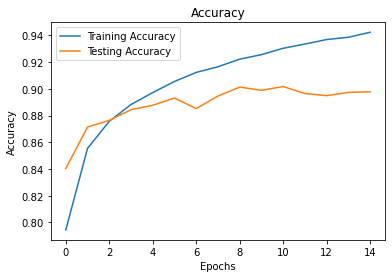

In [10]:
plt.plot(r.history['accuracy'], label = 'Training Accuracy')
plt.plot(r.history['val_accuracy'], label = 'Testing Accuracy')
plt.legend();
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy")

Text(0.5, 1.0, 'Loss')

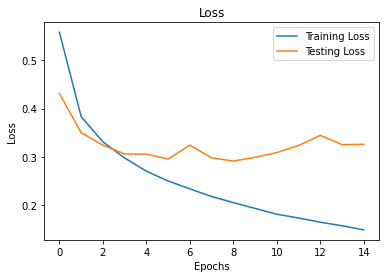

In [11]:
plt.plot(r.history['loss'], label = 'Training Loss')
plt.plot(r.history['val_loss'], label = 'Testing Loss')
plt.legend();
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss")